### LAB № 01

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Для закрепленного за Вами варианта лабораторной работы:

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

In [3]:
import numpy as np

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(df.median(), inplace=True)

df.dtypes.value_counts()

int64      155
float64    125
dtype: int64

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений. 

In [4]:
class_column = df.columns[-1]
unique_values = df[class_column].nunique()

if unique_values > 10:
    df[class_column] = pd.cut(df[class_column], bins=5, labels=False)

df[class_column].unique()

array([2, 1, 0, 4], dtype=int64)

4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. 

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

X = df.drop(columns=[class_column])
y = df[class_column]

score_func = chi2 if (X >= 0).all().all() else f_classif

selector = SelectKBest(score_func=score_func, k=2)
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support(indices=True)
selected_features

array([90, 92], dtype=int64)

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map). 

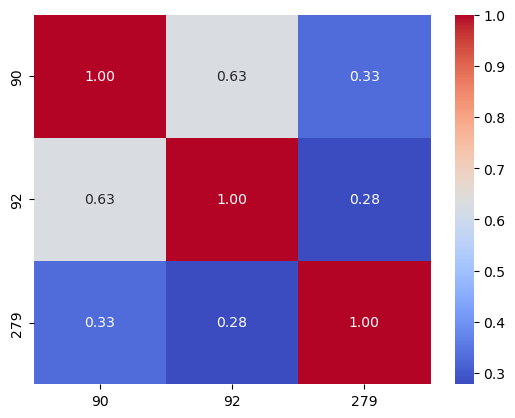

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = df.columns[selected_features].tolist() + [class_column]

correlation_matrix = df[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

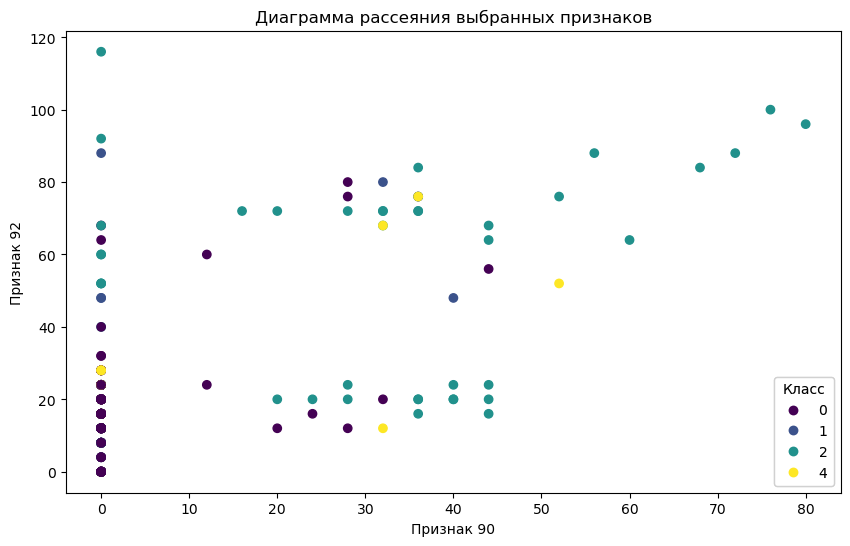

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

scatter = plt.scatter(df[selected_columns[0]], df[selected_columns[1]], c=df[class_column], cmap='viridis')

plt.xlabel(f'Признак {selected_columns[0]}')
plt.ylabel(f'Признак {selected_columns[1]}')
plt.title('Диаграмма рассеяния выбранных признаков')

legend = plt.legend(*scatter.legend_elements(), title="Класс")
plt.gca().add_artist(legend)

plt.show()

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [8]:
from sklearn.decomposition import PCA

X_numeric = df.select_dtypes(include=[float, int])
pca = PCA()

pca.fit(X_numeric)

explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance_ratio >= 0.975).argmax() + 1

n_components

50

8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

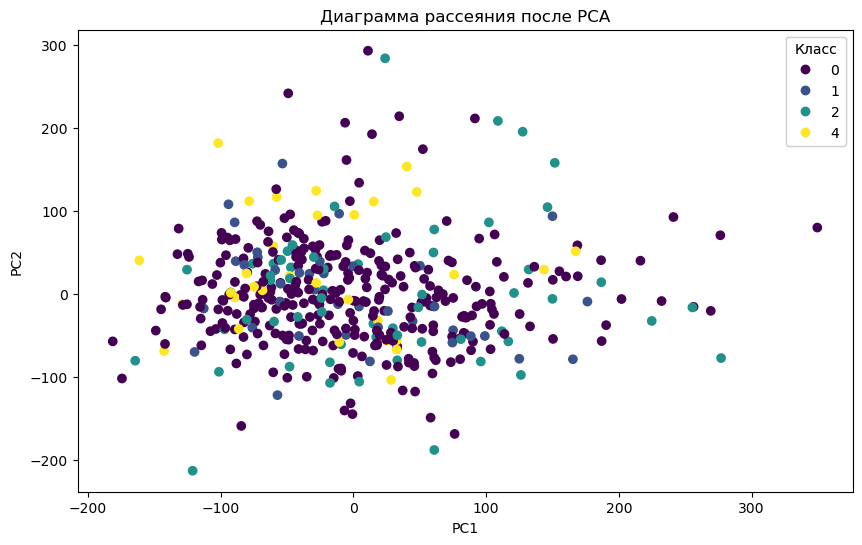

In [9]:
X_numeric = df.select_dtypes(include=[float, int])
y = df[class_column]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Диаграмма рассеяния после PCA')

legend = plt.legend(*scatter.legend_elements(), title="Класс")
plt.gca().add_artist(legend)

plt.show()